In [226]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import  numpy

In [256]:
class Particle:
    
    def __init__(self, r0, v0, a0, t, m=1, radius=2., Id=0):
        
        self.dt = t[1] - t[0]
        
        
        # Atributos instantaneos
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        
        self.p = self.m*self.v
        
        self.f = self.m*self.a
        
        self.u = 0
        # Historial
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.F = np.zeros_like(self.R)
        
        self.P = np.zeros_like(self.R)
        
        self.U = np.zeros(len(t))
        # Fisica
        self.K = 20.
        
        self.VEk = np.zeros(len(t))
        
    def Evolution(self,i):
        
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.SetPotentialEnergy(i)
        
        self.a = self.f/self.m
        
        # Euler
        self.r += self.dt*self.v
        self.v += self.dt*self.a
        
        # Euler-Cromer
  #      self.v += self.dt*self.a
  #      self.r += self.dt*self.v
        
        
    def CalculateForce(self,p,i):
        
        d = np.linalg.norm(self.r - p.r)
        
        compresion = self.radius + p.radius - d
        
        if compresion >= 0:
            
            Fn = self.K * compresion**3
            
            self.n = (self.r - p.r)/d     
            self.f = np.add(self.f,Fn*self.n)
            # Falta implementar energía potencial 
            
            self.u += (self.K * (compresion)**4)/8
    # Aca debes agregar la energía potencial
    def ResetForce(self):
        self.f[:] = 0.
        self.a[:] = 0.
        self.u = 0.
    # Setter
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def SetPotentialEnergy(self,i):
           self.U[i] = self.u
    
    def SetVelocity(self,i):
        self.V[i] = self.v
        self.P[i] = self.m*self.v
        self.VEk[i] = 0.5*self.m*np.dot(self.v,self.v)
        #self.U[i] = (np.linalg.norm(self.f) * compresion)/2
            
    # Getter
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
 
    def GetMomentum(self,scale=1):
        return self.P[::scale]
    
    def GetKineticEnergy(self,scale=1):
        return self.VEk[::scale] 
    
    def GetPotentialEnergy(self,scale=1):
        return self.U[::scale] 
    
    # Debes agregar las paredes en este punto

In [257]:
def GetParticles(N,t):
    
    r0 = np.array([numpy.random.uniform(-20, 20),numpy.random.uniform(-20, 20)])
    v0 = np.array([numpy.random.uniform(-5, 5),numpy.random.uniform(-5, 5)])
    a0 = np.array([0.,0.])
    
    r1 = np.array([numpy.random.uniform(-20, 20),numpy.random.uniform(-20, 20)])
    v1 = np.array([numpy.random.uniform(-5, 5),numpy.random.uniform(-5, 5)])
    a1 = np.array([0.,0.])
    
    r2 = np.array([numpy.random.uniform(-20, 20),numpy.random.uniform(-20, 20)])
    v2 = np.array([numpy.random.uniform(-5, 5),numpy.random.uniform(-5, 5)])
    a2 = np.array([0.,0.])
    
    r3 = np.array([numpy.random.uniform(-20, 20),numpy.random.uniform(-20, 20)])
    v3 = np.array([numpy.random.uniform(-5, 5),numpy.random.uniform(-5, 5)])
    a3 = np.array([0.,0.])
    
    r4 = np.array([numpy.random.uniform(-20, 20),numpy.random.uniform(-20, 20)])
    v4 = np.array([numpy.random.uniform(-5, 5),numpy.random.uniform(-5, 5)])
    a4 = np.array([0.,0.])
    
    r5 = np.array([numpy.random.uniform(-20, 20),numpy.random.uniform(-20, 20)])
    v5 = np.array([numpy.random.uniform(-5, 5),numpy.random.uniform(-5, 5)])
    a5 = np.array([0.,0.])
    
    r6 = np.array([numpy.random.uniform(-20, 20),numpy.random.uniform(-20, 20)])
    v6 = np.array([numpy.random.uniform(-5, 5),numpy.random.uniform(-5, 5)])
    a6 = np.array([0.,0.])
    
    r7 = np.array([numpy.random.uniform(-20, 20),numpy.random.uniform(-20, 20)])
    v7 = np.array([numpy.random.uniform(-5, 5),numpy.random.uniform(-5, 5)])
    a7 = np.array([0.,0.])
    
    r8 = np.array([numpy.random.uniform(-20, 20),numpy.random.uniform(-20, 20)])
    v8 = np.array([numpy.random.uniform(-5, 5),numpy.random.uniform(-5, 5)])
    a8 = np.array([0.,0.])
    
    r9 = np.array([numpy.random.uniform(-20, 20),numpy.random.uniform(-20, 20)])
    v9 = np.array([numpy.random.uniform(-5, 5),numpy.random.uniform(-5, 5)])
    a9 = np.array([0.,0.])
    
    p0 = Particle(r0,v0,a0,t,m=1,radius=2,Id=0)
    p1 = Particle(r1,v1,a1,t,m=1,radius=2,Id=1)
    p2 = Particle(r2,v2,a2,t,m=1,radius=2,Id=1)
    p3 = Particle(r3,v3,a3,t,m=1,radius=2,Id=1)
    p4 = Particle(r4,v4,a4,t,m=1,radius=2,Id=1)
    p5 = Particle(r5,v5,a5,t,m=1,radius=2,Id=1)
    p6 = Particle(r6,v6,a6,t,m=1,radius=2,Id=1)
    p7 = Particle(r7,v7,a7,t,m=1,radius=2,Id=1)
    p8 = Particle(r8,v8,a8,t,m=1,radius=2,Id=1)
    p9 = Particle(r9,v9,a9,t,m=1,radius=2,Id=1)
    
    Particles = [p0,p1,p2,p3,p4,p5,p6,p7,p8,p9]
    
    # Aca deber agregar una rutina montecarlo para crear particulas
    # sobre el plano con velocidades aleatorias.
    
    return Particles

In [258]:
dt = 0.001
tmax = 10
t = np.arange(0,tmax,dt)
Particles = GetParticles(10,t)

In [259]:
def RunSimulation(t,Particles):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        for i in range(len(Particles)):
            for j in range(len(Particles)):
                if i!=j:
                    Particles[i].CalculateForce(Particles[j],i)
                    
                    
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
            # Aca debes agregar la interaccion con la pared
            
            
    return Particles

In [260]:
Particles = RunSimulation(t,Particles)

Running simulation: 100%|██████████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1644.33 Steps/s]


In [261]:
# Bajamos dimensión de la simulacion
scale = 200
t1 = t[::scale]

<IPython.core.display.Javascript object>


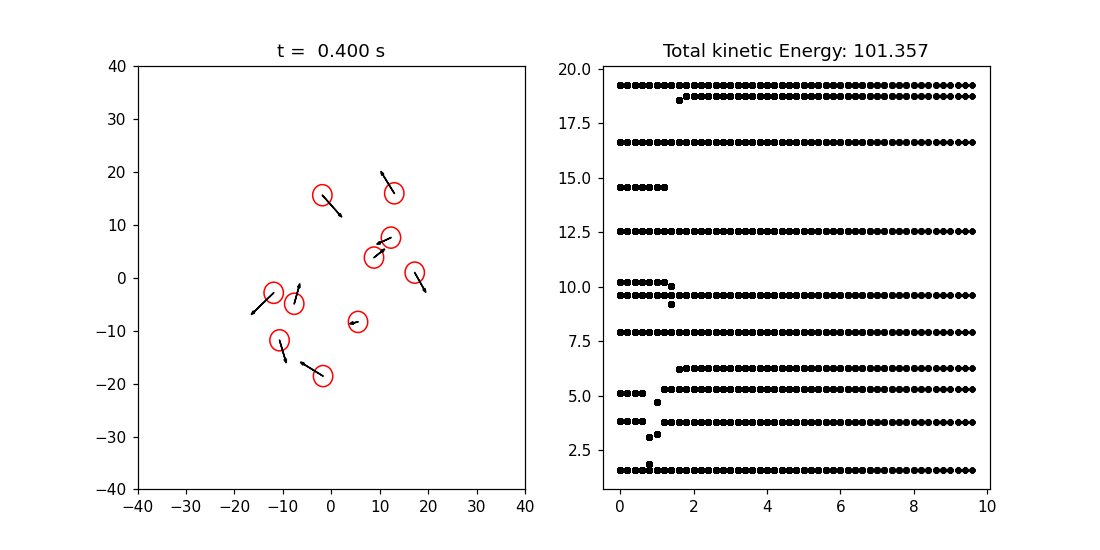

In [262]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

def init():
    
    ax.clear()
    ax.set_xlim(-40,40)
    ax.set_ylim(-40,40)
    
def Update(i):
    
    init()
    ax.set_title(r't =  %.3f s' %(t1[i]))
    
    
    # Queremos calcular la energía total de cinética
    KE = 0. # Kinetic energy
    PyMax = 0.
    PxMax = 0.
    for p in Particles:
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        
        circle = plt.Circle( (x,y), p.radius, color='r', fill=False )
        ax.add_patch(circle)
        
        ax.arrow(x,y,vx,vy,color='k',head_width=0.5,length_includes_head=True)
        
        KE += p.GetKineticEnergy(scale)[i]
        
        ax1.set_title(r'Total kinetic Energy: {:.3f}'.format(KE))
        ax1.scatter(t1[:i], p.GetKineticEnergy(scale)[:i],color='k',marker='.')
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

In [263]:
#Writer = anim.writers['ffmpeg']
#writer_ = Writer(fps=10, metadata=dict(artist='Me'))
#Animation.save('EsferaDura.mp4', writer=writer_)

<IPython.core.display.Javascript object>


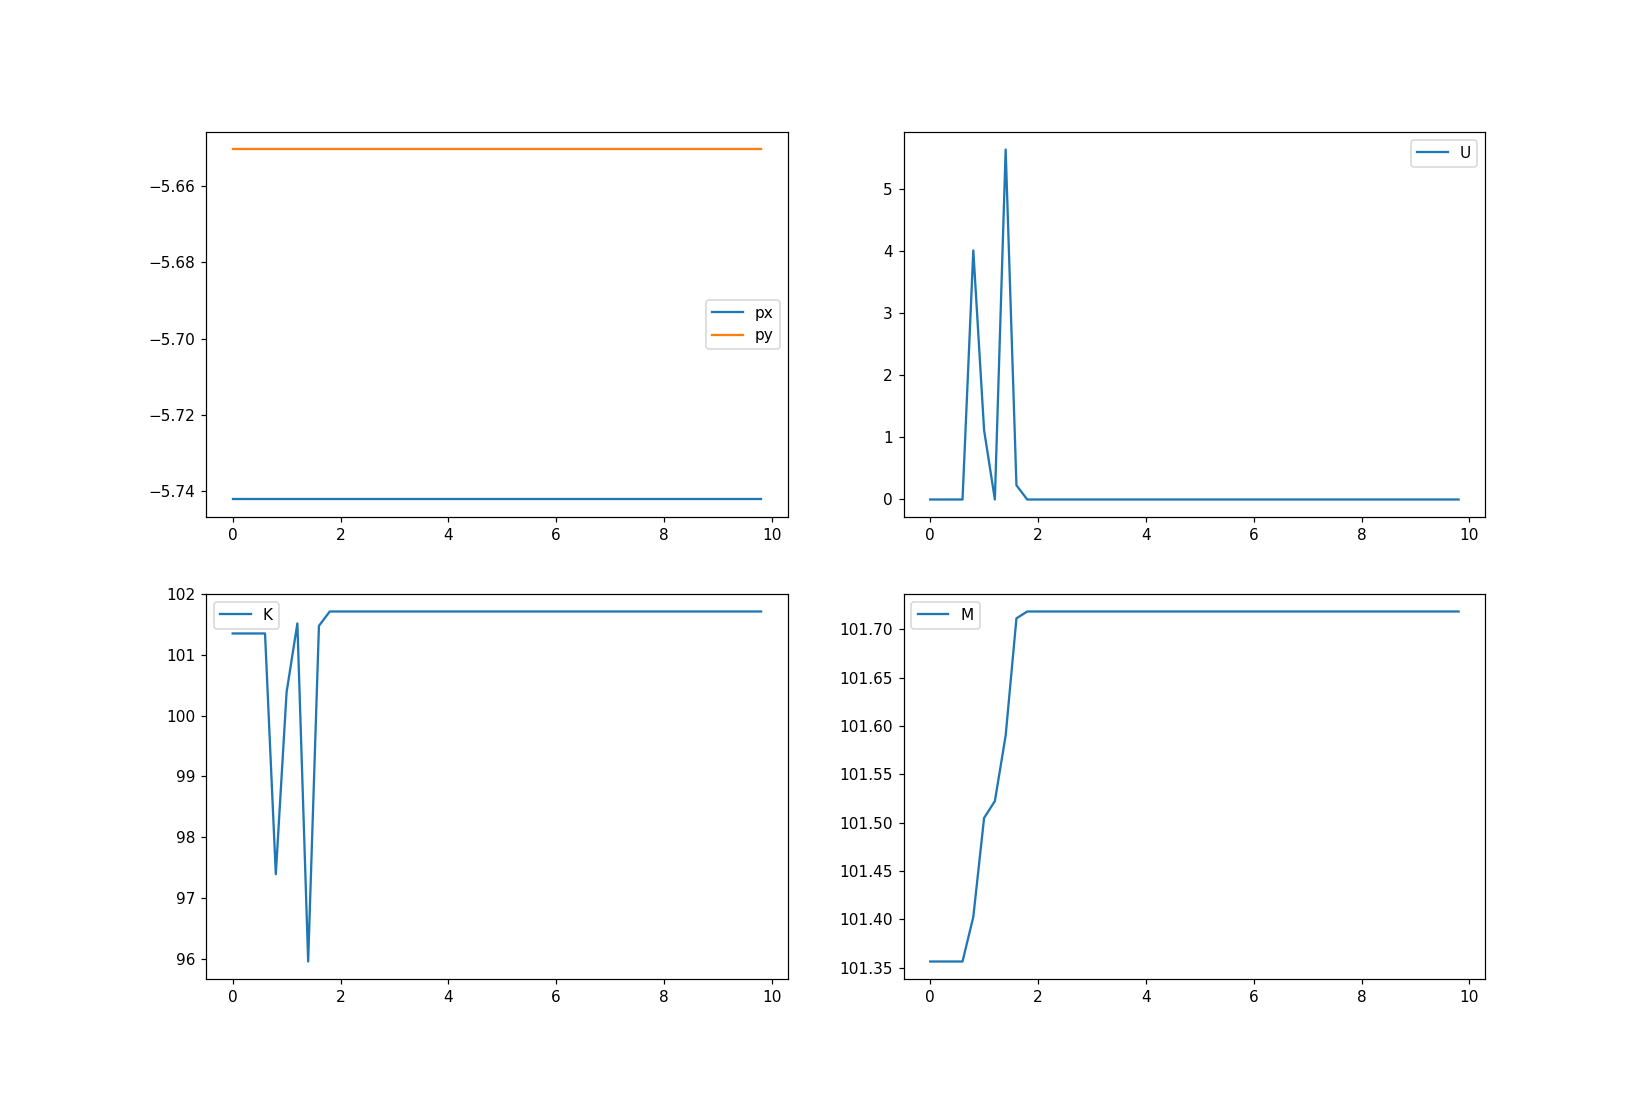

In [266]:
# Plot momentum, potential energy, kinetic energy, and M in a single figure
MomentumT = Particles[0].GetMomentum(scale)
for i in range(1, len(Particles)):
    MomentumT = np.add(MomentumT, Particles[i].GetMomentum(scale))

fig2, axs2 = plt.subplots(2, 2, figsize=(15, 10))
axs2[0, 0].plot(t1, MomentumT[:, 0], label='px')
axs2[0, 0].plot(t1, MomentumT[:, 1], label='py')
axs2[0, 0].legend()

PotentialEnergyT = Particles[0].GetPotentialEnergy(scale)
for i in range(1, len(Particles)):
    PotentialEnergyT = np.add(PotentialEnergyT, Particles[i].GetPotentialEnergy(scale))

axs2[0, 1].plot(t1, PotentialEnergyT, label='U')
axs2[0, 1].legend()

KineticEnergyT = Particles[0].GetKineticEnergy(scale)
for i in range(1, len(Particles)):
    KineticEnergyT = np.add(KineticEnergyT, Particles[i].GetKineticEnergy(scale))

axs2[1, 0].plot(t1, KineticEnergyT, label='K')
axs2[1, 0].legend()

axs2[1, 1].plot(t1, KineticEnergyT + (PotentialEnergyT), label='M')
axs2[1, 1].legend()

plt.show()